## 딥러닝 영상처리
# 신경망

In [2]:
import numpy as np
import matplotlib.pyplot as plt

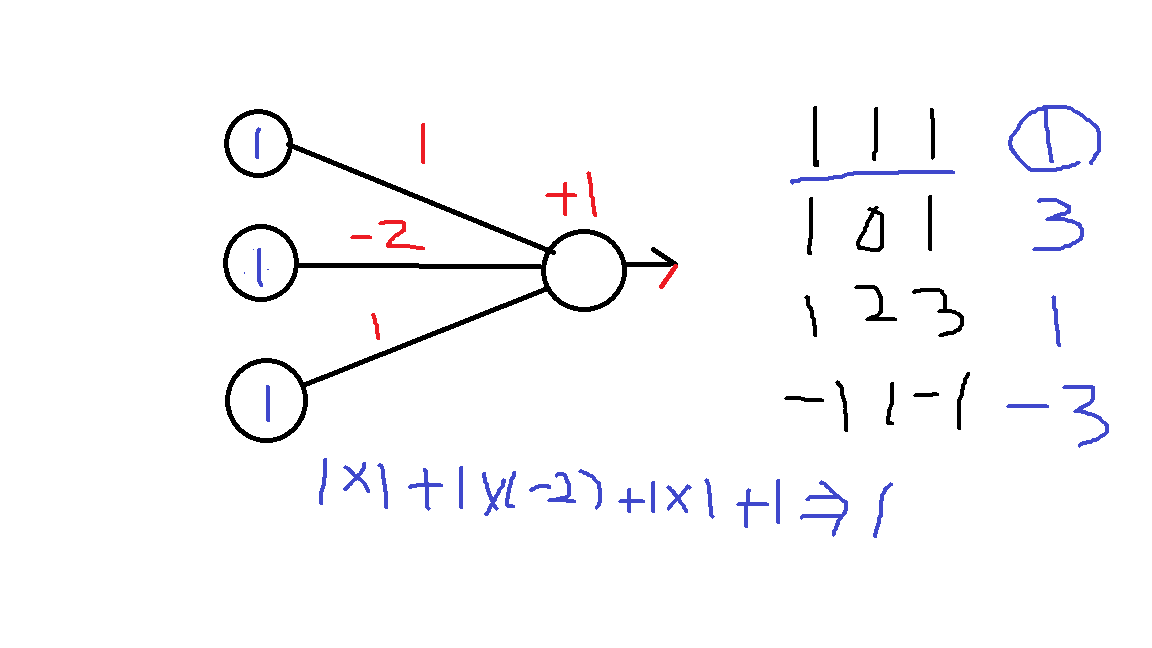

In [15]:
x = np.array([-1,1,-1])
w = np.array([1,-2,1])

In [16]:
x*w

array([-1, -2, -1])

In [17]:
(x*w).sum()

-4

In [18]:
(x*w).sum() + 1

-3

In [19]:
X = np.array([[1,1,1], [1,0,1], [1,2,3], [-1,1,-1]])
w = np.array([1,-2,1])
X

array([[ 1,  1,  1],
       [ 1,  0,  1],
       [ 1,  2,  3],
       [-1,  1, -1]])

In [22]:
X*w

array([[ 1, -2,  1],
       [ 1,  0,  1],
       [ 1, -4,  3],
       [-1, -2, -1]])

In [21]:
(X*w).sum(axis=1) + 1 # axis=1 이면 옆으로 더함

array([ 1,  3,  1, -3])

In [23]:
X@w + 1

array([ 1,  3,  1, -3])

### 신경망 계산방법

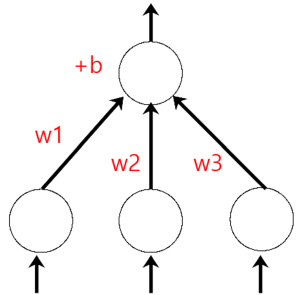

In [15]:
X = np.array([[1,0,1], [1,1,0], [1,-1,1], [1,1,1], [1,2,1]])
X

array([[ 1,  0,  1],
       [ 1,  1,  0],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [ 1,  2,  1]])

In [16]:
W = np.array([1,1,-1])
W

array([ 1,  1, -1])

In [8]:
X*W

array([[ 1,  0, -1],
       [ 1,  1,  0],
       [ 1, -1, -1],
       [ 1,  1, -1],
       [ 1,  2, -1]])

In [9]:
(X*W).sum(axis=1)

array([ 0,  2, -1,  1,  2])

In [10]:
### 행렬식 적용
X@W

array([ 0,  2, -1,  1,  2])

In [11]:
X@(W.reshape(3,1))

array([[ 0],
       [ 2],
       [-1],
       [ 1],
       [ 2]])

In [17]:
### 절편값 적용
b= 0.1

X@W + b

array([ 0.1,  2.1, -0.9,  1.1,  2.1])

### 아이리스 선형회귀

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

In [25]:
X = iris.data[:, :3]
y = iris.data[:, 3]
X.shape, y.shape

((150, 3), (150,))

In [26]:
W = np.random.randn(3)
b = np.random.randn()
W.shape

(3,)

In [27]:
pred_y = X@W + b
pred_y

array([2.23038673, 1.95566085, 1.9835515 , 1.98188535, 2.26033053,
       2.57115967, 2.09329418, 2.19672363, 1.8185683 , 2.03545973,
       2.41156191, 2.19300433, 1.93780272, 1.75252125, 2.53040933,
       2.79974977, 2.44317186, 2.23038673, 2.57693211, 2.40578946,
       2.33215003, 2.35798754, 2.06091023, 2.23077373, 2.28899519,
       2.03751288, 2.22872058, 2.28024181, 2.20044293, 2.07954236,
       2.04959855, 2.26815613, 2.56705337, 2.63643272, 2.03545973,
       2.00512892, 2.26982228, 2.24247241, 1.83437327, 2.21458176,
       2.18053165, 1.51761791, 1.92997713, 2.27652251, 2.53377727,
       1.93780272, 2.43778641, 1.99769033, 2.39370378, 2.11692475,
       3.48218473, 3.31104208, 3.48051858, 2.56011686, 3.16968945,
       2.9948275 , 3.40497978, 2.27679137, 3.2353495 , 2.66575324,
       2.16743569, 3.03015675, 2.60160555, 3.17805583, 2.73679873,
       3.28481757, 3.07257323, 2.83689589, 2.79730656, 2.64158188,
       3.31774231, 2.90627524, 3.08655827, 3.1302539 , 3.10364

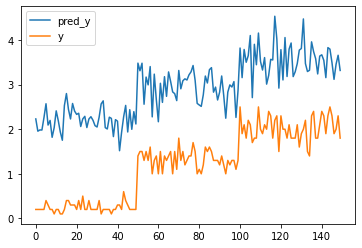

In [28]:
plt.plot(pred_y)
plt.plot(y)
plt.legend(['pred_y', 'y'])

### 오차값 계산
- MSE (Mean Squared Error)

In [29]:
mse = (((y - pred_y)**2).sum())/150
#mse = ((y - pred_y)**2).mean()
mse

3.017726459383923

### 가중치 변경

In [30]:
W1 = W.copy()
W1[0] += 0.01
W1

array([0.18858124, 0.47801927, 0.31996952])

In [31]:
pred_y = X@W1 + b
((y - pred_y)**2).mean()

3.220537094192558

In [32]:
W2 = W.copy()
W2[0] -= 0.01
W2

array([0.16858124, 0.47801927, 0.31996952])

In [33]:
pred_y = X@W2 + b
((y - pred_y)**2).mean()

2.821880957908622

### 중간층 추가시 계산
- 노드 2개인 중간층 추가

In [50]:
W1 = np.random.randn(3,2)
W2 = np.random.randn(2,1)
b1 = np.random.randn(2)
b2 = np.random.randn()
display(W1, W2, b1, b2)

array([[ 1.0394955 ,  0.54257454],
       [-0.15192403, -0.04716975],
       [-0.09680683, -0.82901443]])

array([[0.80945136],
       [1.49228806]])

array([0.22595788, 1.09351419])

-1.1518511351055862

In [51]:
y1 = X@W1 + b1
y1

array([[ 4.86012129e+00,  2.53493002e+00],
       [ 4.72818421e+00,  2.44999998e+00],
       [ 4.49958098e+00,  2.41495257e+00],
       [ 4.39146247e+00,  2.19960920e+00],
       [ 4.74097934e+00,  2.47595559e+00],
       [ 5.08215829e+00,  2.43013015e+00],
       [ 4.35556595e+00,  2.26835972e+00],
       [ 4.76168346e+00,  2.40248809e+00],
       [ 4.22362886e+00,  2.18342969e+00],
       [ 4.70331112e+00,  2.36238157e+00],
       [ 5.13190446e+00,  2.60536699e+00],
       [ 4.54410368e+00,  2.21107174e+00],
       [ 4.62423466e+00,  2.39574253e+00],
       [ 4.13352895e+00,  2.37315959e+00],
       [ 5.53116750e+00,  3.05695021e+00],
       [ 5.33740629e+00,  2.73512052e+00],
       [ 5.12088102e+00,  2.76173592e+00],
       [ 4.86012129e+00,  2.53493002e+00],
       [ 5.40919934e+00,  2.59761949e+00],
       [ 4.80486340e+00,  2.43787765e+00],
       [ 5.15812030e+00,  2.45371502e+00],
       [ 4.82005581e+00,  2.44259462e+00],
       [ 4.36390387e+00,  2.59053154e+00],
       [ 4.

In [52]:
y1.shape

(150, 2)

In [56]:
pred_y = y1@W2 + b
pred_y

array([[8.11573701],
       [7.88220028],
       [7.64485625],
       [7.23598524],
       [7.93129055],
       [8.13907356],
       [7.30952432],
       [7.83841487],
       [7.0759876 ],
       [7.73131481],
       [8.4408445 ],
       [7.37664628],
       [7.71709042],
       [7.28618777],
       [9.43792076],
       [8.80081789],
       [8.66526906],
       [8.11573701],
       [8.65373972],
       [7.92617834],
       [8.23575654],
       [7.94551494],
       [7.79704664],
       [7.75976357],
       [6.98199966],
       [7.78421238],
       [7.706866  ],
       [8.14929799],
       [8.30018346],
       [7.25020962],
       [7.43465607],
       [8.49885429],
       [8.03327841],
       [8.64082025],
       [7.73131481],
       [8.27173469],
       [8.90772531],
       [7.7661807 ],
       [7.18819988],
       [8.00352473],
       [8.08217603],
       [7.48866591],
       [7.14952668],
       [7.6875294 ],
       [7.39998284],
       [7.71709042],
       [7.79462946],
       [7.348

In [57]:
pred_y.shape

(150, 1)

In [58]:
mse = ((y - pred_y.ravel())**2).mean()
mse

30.095389406552314